# Luangwa Buffalo Zero-Infated Poisson analysis 

### Data wrangling

The first step is to import the various python packages needed to conduct the analysis:

In [1]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as gammaf
from scipy.misc import factorial as ft
import seaborn as sns
#from mpl_toolkits.basemap import Basemap as bm
import pymc as pm

Because arrays are more efficient than loops, we'll need a couple of functions to do some array indexing in the BHM. These are defined by the `def` statement in Python:

In [3]:
# Return list of unique items and an index of their position in L
def indexall(L):
    poo = []
    for p in L:
        if not p in poo:
            poo.append(p)
    Ix = np.array([poo.index(p) for p in L])
    return poo,Ix

# Return list of unique items and an index of their position in long, relative to short
def subindexall(short,long):
    poo = []
    out = []
    for s,l in zip(short,long):
        if not l in poo:
            poo.append(l)
            out.append(s)
    return indexall(out)

The next step is to import the data:

In [4]:
# Import test dataset
xdata = pd.read_csv('luangwa.csv')
xdata.head()

,cell_id,transect_id,natpark_in_out,survey_id,country_id,zebra_count,zebra_observations,livestock_count,livestock_observations,buffalo_count,buffalo_observations,agriculture_count,agriculture_observations,humanresources_count,humanresources_observations
0,45339,6303,0,871,19,0,0,0,0,0,0,0,0,0,0
1,45340,6303,0,871,19,0,0,0,0,0,0,0,0,0,0
2,45341,6303,1,871,19,0,0,0,0,0,0,0,0,0,0
3,45342,6303,1,871,19,0,0,0,0,0,0,0,0,0,0
4,45343,6303,1,871,19,0,0,0,0,0,0,0,0,0,0


In [5]:
xdata.columns.values

array(['cell_id', 'transect_id', 'natpark_in_out', 'survey_id',
       'country_id', 'zebra_count', 'zebra_observations',
       'livestock_count', 'livestock_observations', 'buffalo_count',
       'buffalo_observations', 'agriculture_count',
       'agriculture_observations', 'humanresources_count',
       'humanresources_observations'], dtype=object)

In [6]:
xdata.survey_id.unique()

array([871, 872, 874, 873])

In [7]:
xdata.transect_id.unique()

array([6303, 6304, 6305, 6306, 6307, 6308, 6309, 6310, 6311, 6312, 6313,
       6314, 6315, 6316, 6317, 6318, 6319, 6320, 6321, 6322, 6323, 6324,
       6325, 6326, 6327, 6328, 6329, 6330, 6331, 6332, 6333, 6334, 6335,
       6336, 6337, 6338, 6339, 6340, 6341, 6342, 6343, 6344, 6345, 6346,
       6347, 6348, 6349, 6350, 6351, 6352, 6353, 6354, 6355, 6356, 6357,
       6358, 6359, 6360, 6361, 6362, 6363, 6364, 6365, 6366, 6367, 6368,
       6369, 6370, 6371, 6372, 6373, 6374, 6375, 6376, 6377, 6378, 6379,
       6380, 6381, 6382, 6383, 6384, 6385, 6386, 6387, 6388, 6389, 6390,
       6391, 6392, 6393, 6394, 6395, 6396, 6397, 6398, 6399, 6400, 6401,
       6402, 6403, 6404, 6405, 6406, 6407, 6408, 6409, 6410, 6411, 6412,
       6413, 6414, 6415, 6416, 6417, 6418, 6419, 6420, 6421, 6422, 6423,
       6424, 6425, 6426, 6427, 6428, 6429, 6430, 6431, 6432, 6433, 6434,
       6435, 6436, 6437, 6438, 6439, 6440, 6441, 6442, 6443, 6444, 6445,
       6446, 6447, 6448, 6449, 6450, 6451, 6452, 64

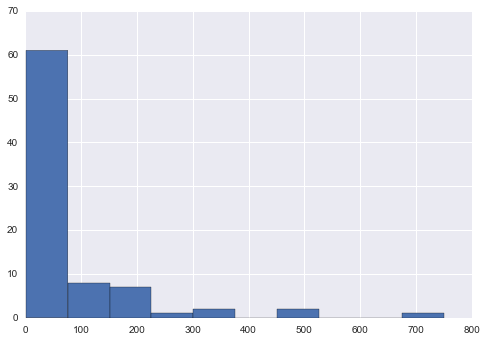

In [8]:
# Specify response - change here for other critters
response = xdata.buffalo_count.values

# Plot
plt.hist(response[response>0]);

In [9]:
# Observed zeros
Iz = (response==0)*1
# Observed counts
Ic = (response>0)*1

In [10]:
sum(Ic)/len(Ic)

0.025990491283676705

In [11]:
# Create index to associate each cell with a given transect
Transect,It = indexall(xdata.transect_id.values)
ntrans = len(Transect)

# Use Python list indexing to create social-site indexing array
tindx = np.array([[x for x in It].index(i) for i in range(ntrans)])

# Indicator for being in/out of park
Park = xdata.natpark_in_out.values[tindx]

In [12]:
np.array(Transect)

array([6303, 6304, 6305, 6306, 6307, 6308, 6309, 6310, 6311, 6312, 6313,
       6314, 6315, 6316, 6317, 6318, 6319, 6320, 6321, 6322, 6323, 6324,
       6325, 6326, 6327, 6328, 6329, 6330, 6331, 6332, 6333, 6334, 6335,
       6336, 6337, 6338, 6339, 6340, 6341, 6342, 6343, 6344, 6345, 6346,
       6347, 6348, 6349, 6350, 6351, 6352, 6353, 6354, 6355, 6356, 6357,
       6358, 6359, 6360, 6361, 6362, 6363, 6364, 6365, 6366, 6367, 6368,
       6369, 6370, 6371, 6372, 6373, 6374, 6375, 6376, 6377, 6378, 6379,
       6380, 6381, 6382, 6383, 6384, 6385, 6386, 6387, 6388, 6389, 6390,
       6391, 6392, 6393, 6394, 6395, 6396, 6397, 6398, 6399, 6400, 6401,
       6402, 6403, 6404, 6405, 6406, 6407, 6408, 6409, 6410, 6411, 6412,
       6413, 6414, 6415, 6416, 6417, 6418, 6419, 6420, 6421, 6422, 6423,
       6424, 6425, 6426, 6427, 6428, 6429, 6430, 6431, 6432, 6433, 6434,
       6435, 6436, 6437, 6438, 6439, 6440, 6441, 6442, 6443, 6444, 6445,
       6446, 6447, 6448, 6449, 6450, 6451, 6452, 64

In [13]:
Park

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0])

In [14]:
# Create index to associate each transect with a given survey
Survey,Is = subindexall(xdata.survey_id.values,xdata.transect_id.values)
nsurvey = len(Survey)

In [15]:
Survey

[871, 872, 874, 873]

In [16]:
Is

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

## Bayesian hierarchical model

### Count model

In [17]:
# Global intercept
#gamma_0 = pm.Normal('global_mean', mu=0.0, tau=0.001, value=0.)

# Standard deviation of intercepts
#sigma1 = pm.Uniform('SD1', lower=0, upper=100, value=5.)
# Precisions of survey-scale intercepts
#tau1 = pm.Lambda('tau1', lambda sd=sigma1: sd**-2)

# Distribution of survey-scale intercepts
#eta_0 = pm.Normal('survey', mu=gamma_0, tau=tau1, value=np.ones(nsurvey))
eta_0 = pm.Normal('survey', mu=0.0, tau=0.001, value=np.ones(nsurvey))

# Standard deviation of transect-scale intercepts
sigma2 = pm.Uniform('SD2', lower=0, upper=100, value=1.)
# Precisions of transect-scale intercepts
tau2 = pm.Lambda('tau2', lambda sd=sigma2: sd**-2)

# Transect-scale intercepts
#beta_0 = pm.Normal('transect', mu=eta_0[Is], tau=tau2)

# Park effect
beta_1 = pm.Normal('park', mu=0.0, tau=0.001)

# Park model
mu = pm.Lambda('mu', lambda b0=eta_0[Is], b1=beta_1: b0+b1*Park)

# Transect-scale intercepts
beta_0 = pm.Normal('transect', mu=mu, tau=tau2)

# Link function for rate
lambduh = pm.Lambda('lambduh', lambda b=beta_0[It]: np.exp(b))

### Zeros model

In [18]:
# Global intercept
#gamma_0_z = pm.Normal('global_mean_z', mu=0.0, tau=0.001, value=0.)

# Standard deviation of intercepts
#sigma1_z = pm.Uniform('SD1_z', lower=0, upper=100, value=5.)
# Precisions of survey-scale intercepts
#tau1_z = pm.Lambda('tau1_z', lambda sd=sigma1_z: sd**-2)

# Distribution of survey-scale intercepts
#eta_0_z = pm.Normal('survey_z', mu=gamma_0_z, tau=tau1_z, value=np.ones(nsurvey))
eta_0_z = pm.Normal('survey_z', mu=0.0, tau=0.0001, value=np.ones(nsurvey))

# Standard deviation of transect-scale intercepts
sigma2_z = pm.Uniform('SD2_z', lower=0, upper=100, value=1.)
# Precisions of transect-scale intercepts
tau2_z = pm.Lambda('tau2_z', lambda sd=sigma2_z: sd**-2)

# Transect-scale intercepts
beta_0_z = pm.Normal('transect_z', mu=eta_0_z[Is], tau=tau2_z)


# Park effect
beta_1_z = pm.Normal('park_z', mu=0.0, tau=0.001)

# Park model
mu_z = pm.Lambda('mu_z', lambda b0=eta_0_z[Is], b1=beta_1_z: b0+b1*Park)

# Transect-scale intercepts
beta_0_z = pm.Normal('transect_z', mu=mu_z, tau=tau2_z)

# Zeros model
psi = pm.Lambda('psi', lambda b0=beta_0_z[It]: pm.invlogit(b0))

In [19]:
# ZINB likelihood
@pm.observed(dtype=int, plot=False)
def zinb(value=response, mu=lambduh, alpha=1., psi=psi):
    # Initialise likeihood
    like = 0.0
    # Add zero component; zero probability + P(NB==0); value flags for non-zeros to cancel out
    like += np.sum((np.log(psi + (1.-psi)*(alpha/(mu+alpha))**alpha))*Iz)
    # Add count component; non-zero probability + P(NB>0); value flags for zeros to cancel out
    like += np.sum((np.log(1.-psi) + np.log(gammaf(alpha+value))-np.log((ft(value)*gammaf(alpha))) + alpha*np.log(alpha/(mu+alpha)) + value*np.log(mu/(mu+alpha)))*Ic)
    return like

In [20]:
M = pm.MCMC(locals())
M.sample(100000, 99000)
M.sample(100000, 99000)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pymc-2.3.6-py3.5-macosx-10.6-intel.egg/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 100000 of 100000 complete in 86.1 sec

Plotting survey_0
Plotting survey_1
Plotting survey_2
Plotting survey_3


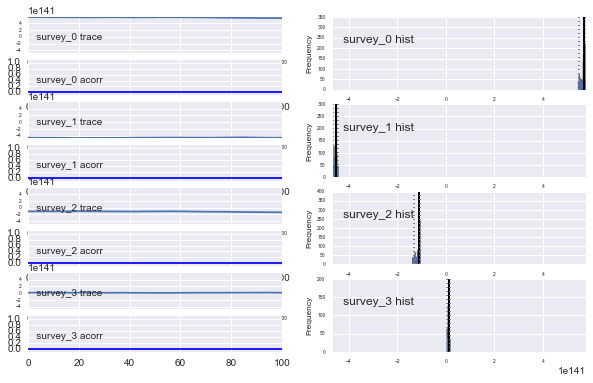

In [21]:
pm.Matplot.plot(M.eta_0)

In [22]:
[np.mean(x) for x in np.exp(M.eta_0.trace()).T]

[inf, 0.0, 0.0, inf]

In [23]:
[np.percentile(x,2.5) for x in np.exp(M.eta_0.trace()).T]

[inf, 0.0, 0.0, inf]

In [24]:
[np.percentile(x,97.5) for x in np.exp(M.eta_0.trace()).T]

[inf, 0.0, 0.0, inf]

Plotting park


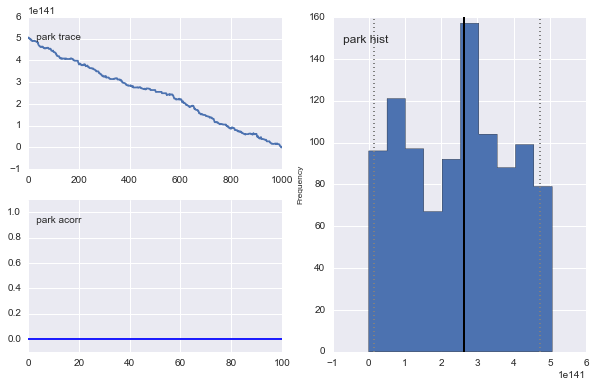

In [25]:
pm.Matplot.plot(M.beta_1)

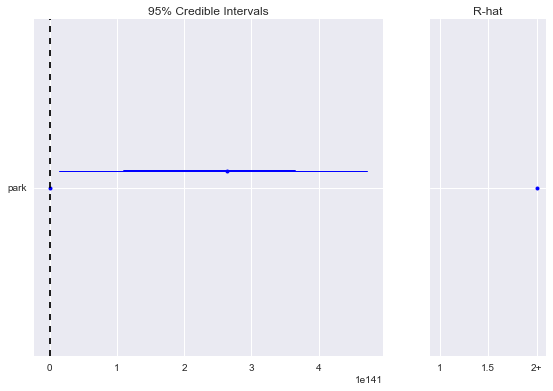

In [26]:
pm.Matplot.summary_plot(M.beta_1)

Plotting park_z


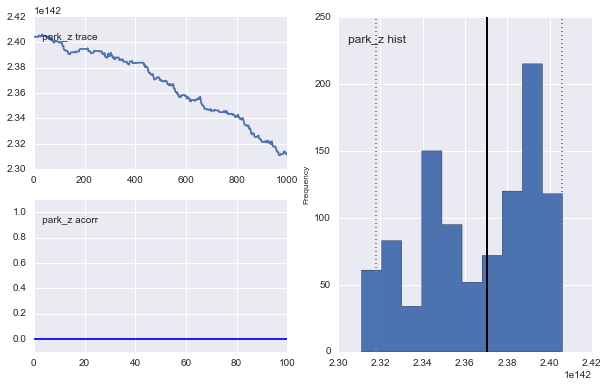

In [27]:
pm.Matplot.plot(M.beta_1_z)

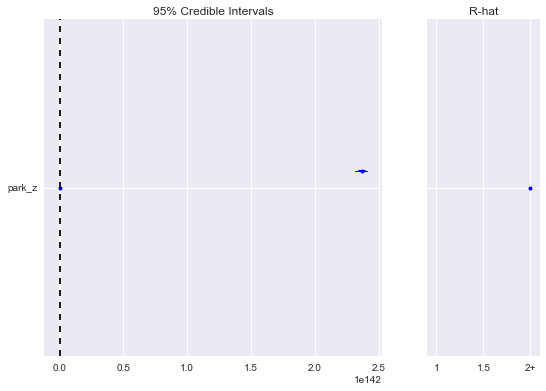

In [28]:
pm.Matplot.summary_plot(M.beta_1_z)

In [29]:
tmp = response[response>0]
tmp2 = xdata.natpark_in_out.values[response>0]

np.mean(tmp[tmp2==1])

73.730769230769226

In [30]:
np.mean(tmp[tmp2==0])

62.56666666666667